In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
s1 = pd.Series([11,22,33,44,55])
print("the series values are:", s1.values)

the series values are: [11 22 33 44 55]


In [3]:
print("the index values are:", s1.index.values)

the index values are: [0 1 2 3 4]


In [6]:
s2 = pd.Series([89,74,56,92,64],index=['Mary','John',"Joseph","Cynthia",'Rose']) #defining t

In [7]:
s2.name= 'Marks' #set series name

In [8]:
s2.index.name='Student_name' #set index name

In [9]:
print("the indexed series values are:\n",s2)

the indexed series values are:
 Student_name
Mary       89
John       74
Joseph     56
Cynthia    92
Rose       64
Name: Marks, dtype: int64


In [10]:
s2[3]

C:\Users\ibmuser\AppData\Local\Temp\ipykernel_13796\2948264381.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s2[3]


92

In [12]:
s2['John']

74

In [13]:
data ={'Months':['Jan','Feb','Mar','Apr','May','Jun','July'],
      'Days':['Sun','Mon','Tue','Wed','Thurs','Fri','Sat'],
      "NoOfDays":[31,28,31,30,31,30,31]}

In [15]:
df= pd.DataFrame(data)
df

,Months,Days,NoOfDays
0,Jan,Sun,31
1,Feb,Mon,28
2,Mar,Tue,31
3,Apr,Wed,30
4,May,Thurs,31
5,Jun,Fri,30
6,July,Sat,31


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Months    7 non-null      object
 1   Days      7 non-null      object
 2   NoOfDays  7 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 300.0+ bytes


In [17]:
df.shape

(7, 3)

In [18]:
data2 ={'Months':['Aug','Sept','Oct','Nov','Dec','NaN','NaN'],
      'Days':['Sun','Mon','Tue','Wed','Thurs','Fri','Sat'],
      "NoOfDays":[31,30,31,30,31,'NaN','NaN']}

In [19]:
df1 = pd.DataFrame(data2)
df1

,Months,Days,NoOfDays
0,Aug,Sun,31
1,Sept,Mon,30
2,Oct,Tue,31
3,Nov,Wed,30
4,Dec,Thurs,31
5,NaN,Fri,NaN
6,NaN,Sat,NaN


In [20]:
#concatenation
df3 = pd.concat([df,df1])
df3

,Months,Days,NoOfDays
0,Jan,Sun,31
1,Feb,Mon,28
2,Mar,Tue,31
3,Apr,Wed,30
4,May,Thurs,31
5,Jun,Fri,30
6,July,Sat,31
0,Aug,Sun,31
1,Sept,Mon,30
2,Oct,Tue,31


In [21]:
print(df.append(df1))

AttributeError: 'DataFrame' object has no attribute 'append'

# Join

In [22]:
pd.merge(df,df1, on='NoOfDays', how='inner')

,Months_x,Days_x,NoOfDays,Months_y,Days_y
0,Jan,Sun,31,Aug,Sun
1,Jan,Sun,31,Oct,Tue
2,Jan,Sun,31,Dec,Thurs
3,Mar,Tue,31,Aug,Sun
4,Mar,Tue,31,Oct,Tue
5,Mar,Tue,31,Dec,Thurs
6,May,Thurs,31,Aug,Sun
7,May,Thurs,31,Oct,Tue
8,May,Thurs,31,Dec,Thurs
9,July,Sat,31,Aug,Sun


In [23]:
df.groupby(['NoOfDays','Months']).max()

Days
NoOfDays Months       
28       Feb       Mon
30       Apr       Wed
         Jun       Fri
31       Jan       Sun
         July      Sat
         Mar       Tue
         May     Thurs

# Pivot table

In [24]:
pd.pivot_table(df,values='NoOfDays',index=['Months'], columns=['Days'])

Days,Fri,Mon,Sat,Sun,Thurs,Tue,Wed
Months,,,,,,,
Apr,NaN,NaN,NaN,NaN,NaN,NaN,30.0
Feb,NaN,28.0,NaN,NaN,NaN,NaN,NaN
Jan,NaN,NaN,NaN,31.0,NaN,NaN,NaN
July,NaN,NaN,31.0,NaN,NaN,NaN,NaN
Jun,30.0,NaN,NaN,NaN,NaN,NaN,NaN
Mar,NaN,NaN,NaN,NaN,NaN,31.0,NaN
May,NaN,NaN,NaN,NaN,31.0,NaN,NaN


# generating yje sample data

In [25]:
#generating the sample data
data = np.array([15,8,4])
labelpie = ['A','B','C']
colorpie = ['cyan','blue','yellow']
explodepie = (0,0.1,0)

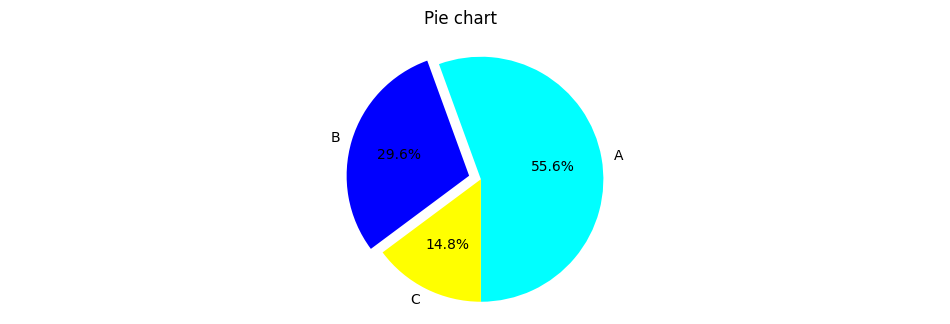

In [26]:
#plot the pie chart
fig,ax = plt.subplots(figsize=(12,3.5))
ax.pie(data,labels=labelpie,explode=explodepie,autopct='%1.1f%%', startangle=270, colors=colorpie)
ax.axis('equal') #keep it a circle
fig.suptitle("Pie chart")
fig.savefig('piechart.png', dpi=125)

# stacked bar chart

In [27]:
predata = np.array([19,6,11,9])
postdata = np.array([15,11,8,6])
labelstack = ['Survey ' + x for x in list('ABCD')]

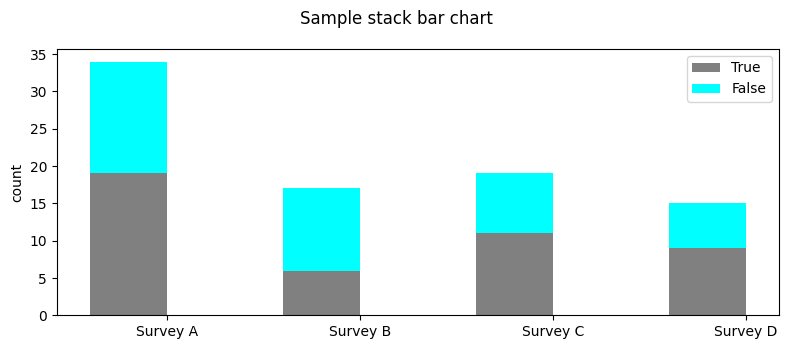

In [28]:
# plot the stack bar
fig , ax = plt.subplots(figsize=(8,3.5))
width = 0.4 #bar width
xlocs= np.arange(len(predata)+2)
adjlocs = xlocs[1:-1]-width/2.0
ax.bar(adjlocs, predata, width, color='grey',label='True')
ax.bar(adjlocs,postdata, width, color='cyan', label='False', bottom = predata)
#labels, titles then save
ax.set_xticks(ticks=xlocs[1:-1])
ax.set_xticklabels(labelstack)
ax.yaxis.grid(False)
ax.legend(loc='best')
ax.set_ylabel('count')
fig.suptitle('Sample stack bar chart')
fig.tight_layout(pad=1)
fig.savefig('stckbar_chart.png',dpi=125)


In [29]:
import seaborn as sns

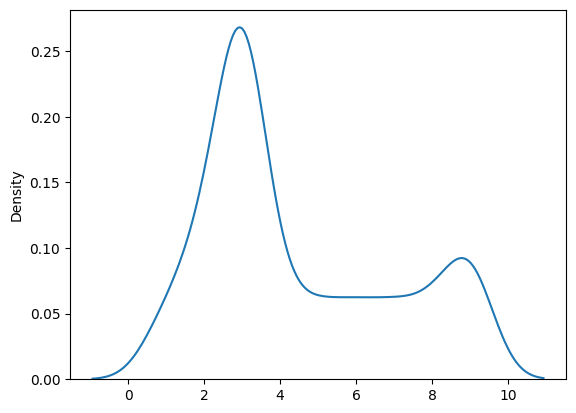

In [30]:
dataset = [7,2,3,1,5,8,6,3,2,4,9,3,3,3,3,9]
sns.kdeplot(dataset, bw_method=0.25)
plt.show()

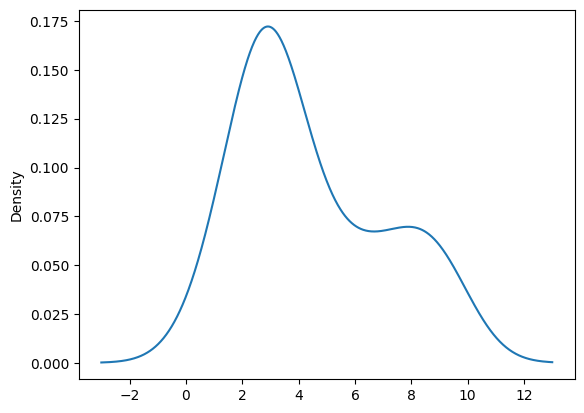

In [31]:
# using matplotlib
dataset = [7,2,3,1,5,8,6,3,2,4,9,3,3,3,3,9]
pd.Series(dataset).plot(kind='density', bw_method=0.5)
plt.show()

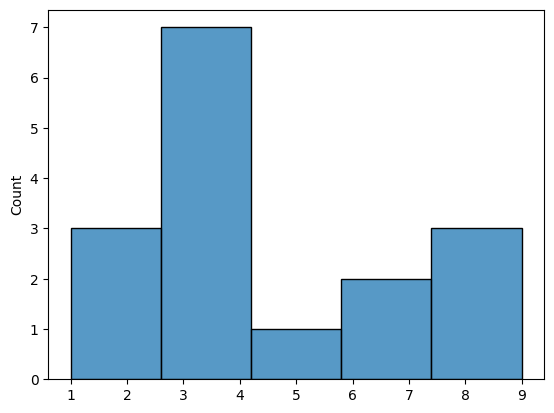

In [32]:
dataset = [7,2,3,1,5,8,6,3,2,4,9,3,3,3,3,9]
sns.histplot(dataset,kde_kws={'bw_method':0.3})
plt.show()

# violin plot

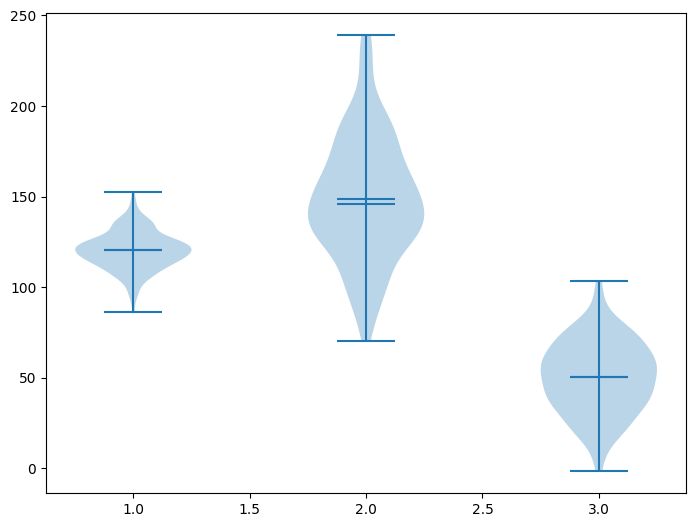

In [33]:
data1 = np.random.normal(120,10,200)
data2 = np.random.normal(150,30,200)
data3 = np.random.normal(50,20,200)
dataarr= [data1,data2,data3]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

violin = ax.violinplot(dataarr,showmeans= True, showmedians =True, showextrema = True)
plt.show()

# STEM PLOT

In [34]:
#creating /generating data
locs=[0,1,2,3,4,5,6,7,8,9]
heads = [3,4,8,2,6,5,9,4,7,2]


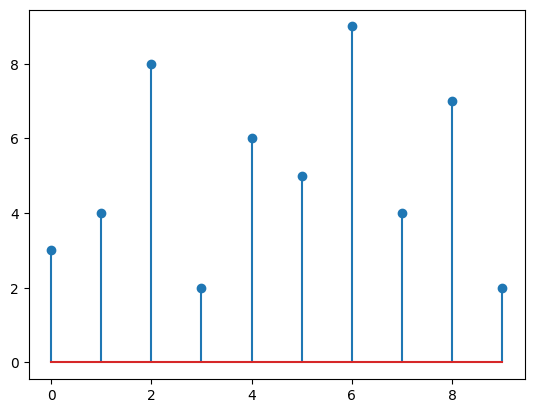

In [35]:
#stem plot creation
plt.stem(locs,heads)
plt.show()

# 3D scatter plot

In [36]:
pip install mpl_toolkits

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement mpl_toolkits (from versions: none)
ERROR: No matching distribution found for mpl_toolkits


In [38]:
from mpl_toolkits.mplot3d import Axes3D

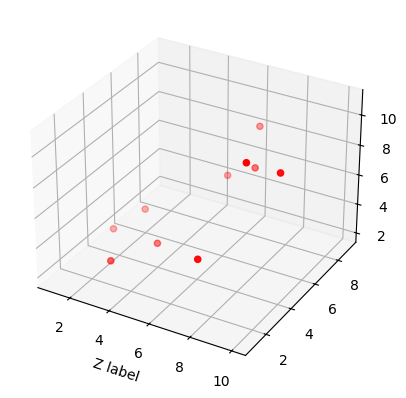

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

x=[1,2,3,4,5,6,7,8,9,10]
y=[5,6,2,4,8,9,7,1,3,4]
z=[2,3,3,3,5,8,7,6,11,10]

ax.scatter(x,y,z ,  c='r' ,marker='o')
ax.set_xlabel('X label')
ax.set_xlabel('Y label')
ax.set_xlabel('Z label')
plt.show()


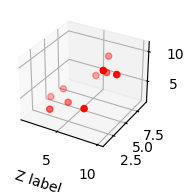

In [44]:
fig = plt.figure()
ax = fig.add_subplot(234,projection='3d')

x=[1,2,3,4,5,6,7,8,9,10]
y=[5,6,2,4,8,9,7,1,3,4]
z=[2,3,3,3,5,8,7,6,11,10]

ax.scatter(x,y,z ,  c='r' ,marker='o')
ax.set_xlabel('X label')
ax.set_xlabel('Y label')
ax.set_xlabel('Z label')
plt.show()

# twinaxis

In [45]:
num=np.arange(0.01,10.0,0.001)
data1= np.exp(num)
data1

array([1.01005017e+00, 1.01106072e+00, 1.01207229e+00, ...,
       2.19604854e+04, 2.19824569e+04, 2.20044503e+04])

In [47]:
num=np.arange(0.01,10.0,0.001)
data1= np.exp(num)
data2=np.cos(0.4 *np.pi*num)
data2

array([0.99992104, 0.99990446, 0.9998863 , ..., 0.99999289, 0.99999684,
       0.99999921])

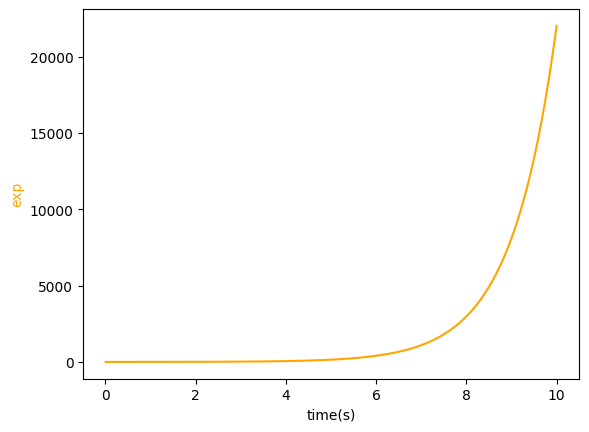

In [49]:
num=np.arange(0.01,10.0,0.001)
data1= np.exp(num)
data2=np.cos(0.4 *np.pi*num)

fig,ax1 = plt.subplots()
color1 = 'orange'
ax1.set_xlabel('time(s)')
ax1.set_ylabel('exp',color=color1)
ax1.plot(num,data1,color=color1)

plt.show()

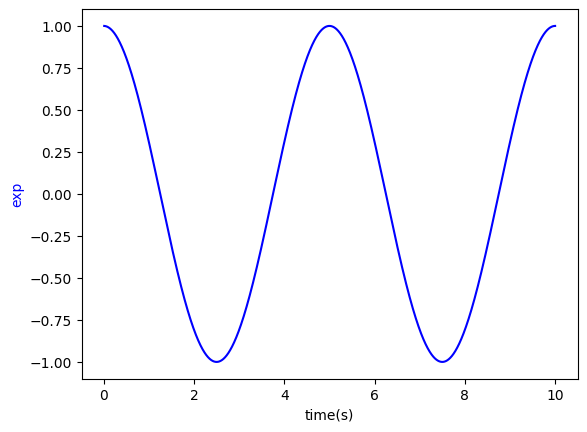

In [50]:
fig,ax1 = plt.subplots()
color1 = 'blue'
ax1.set_xlabel('time(s)')
ax1.set_ylabel('exp',color=color1)
ax1.plot(num,data2,color=color1)

NameError: name 'blue' is not defined

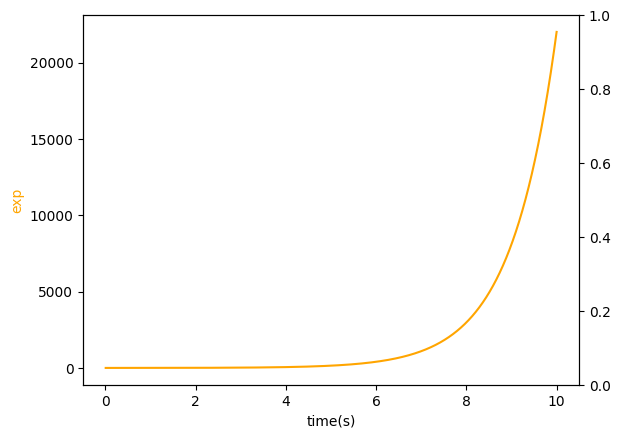

In [54]:
fig,ax1 = plt.subplots()
color1 = 'orange'
ax1.set_xlabel('time(s)')
ax1.set_ylabel('exp',color=color1)
ax1.plot(num,data1,color=color1)

ax2 =ax1.twinx()

color2 =blue
ax1.set_xlabel('time(s)')
ax1.set_ylabel('exp',color=color2)
ax1.plot(num,data2,color=color2)